In [2]:
import pickle

f = open('possibly_died.pkl', 'rb')
possibly_died = pickle.load(f)
f.close()

In [3]:
import numpy as np
import deepcell_tracking.utils as tracking
from deepcell_tracking.utils import Track
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imsave, imread, imshow

file_name = Path("/data/3T3_HeLa_HEK_RAW_V2.trks")
cell_tracks = Track(file_name)

In [4]:
cell_tracks._correct_lineages()
cell_tracks._remove_invalid_batches()

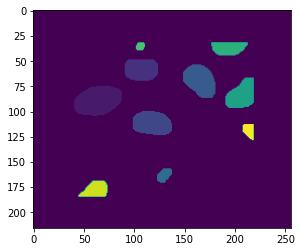

In [5]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[0][12])

In [6]:
cell_tracks.centroids[0][12][13]

array([119.152176, 213.71014 ], dtype=float32)

In [7]:
cell_tracks.y[0][12][119][213]

array([14], dtype=int32)

In [8]:
x_min = 0
x_max = 0
y_min = 0
y_max = 0
for x in range(cell_tracks.X.shape[2]):
    if cell_tracks.X[0][0][x][100] != 0:
        x_min = x - 1
        break
for x in range(cell_tracks.X.shape[2] - 1, -1, -1):
    if cell_tracks.X[0][0][x][100] != 0:
        x_max = x + 1
        break
for y in range(cell_tracks.X.shape[3]):
    if cell_tracks.X[0][0][100][y] != 0:
        y_min = y - 1
        break
for y in range(cell_tracks.X.shape[3] - 1, -1 , -1):
    if cell_tracks.X[0][0][100][y] != 0:
        y_max = y + 1
        break        

In [9]:
(x_min, x_max)

(30, 185)

In [10]:
(y_min, y_max)

(36, 219)

In [11]:
died = {}
for batch_num in possibly_died:
    died[batch_num] = {}
    for cell_num in possibly_died.get(batch_num):
        death_frame = possibly_died.get(batch_num).get(cell_num)
        death_img = cell_tracks.y[batch_num][death_frame]
        on_border = False
        for x in range(x_min + 1, x_max):
            if death_img[x][y_min + 1] == cell_num or death_img[x][y_max - 1] == cell_num:
                on_border = True
        for y in range(y_min + 1, y_max):
            if death_img[x_min + 1][y] == cell_num or death_img[x_max - 1][y] == cell_num:
                on_border = True
        if on_border == False:
            died[batch_num][cell_num] = possibly_died.get(batch_num).get(cell_num)

In [12]:
died

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {14: 0},
 7: {},
 8: {},
 9: {},
 10: {18: 4},
 11: {},
 12: {},
 13: {},
 14: {},
 15: {},
 16: {},
 17: {},
 18: {},
 19: {},
 20: {13: 4},
 21: {},
 22: {},
 23: {},
 24: {17: 18},
 25: {},
 26: {},
 27: {},
 28: {},
 29: {},
 30: {},
 31: {},
 32: {},
 33: {},
 34: {},
 35: {},
 36: {},
 37: {},
 38: {},
 39: {},
 40: {},
 41: {},
 42: {},
 43: {},
 44: {},
 45: {},
 46: {},
 47: {},
 48: {},
 49: {},
 50: {},
 51: {},
 52: {4: 21},
 53: {},
 54: {13: 7},
 55: {},
 56: {},
 57: {},
 58: {},
 59: {},
 60: {},
 61: {},
 62: {},
 63: {7: 11},
 64: {},
 65: {},
 66: {},
 67: {},
 68: {},
 69: {},
 70: {},
 71: {},
 72: {},
 73: {},
 74: {},
 75: {},
 76: {},
 77: {},
 78: {},
 79: {},
 80: {},
 81: {},
 82: {},
 83: {},
 84: {},
 85: {},
 86: {},
 87: {},
 88: {},
 89: {},
 90: {},
 91: {},
 92: {},
 93: {},
 94: {},
 95: {},
 96: {},
 97: {},
 98: {},
 99: {},
 100: {},
 101: {},
 102: {},
 103: {},
 104: {},
 105: {},
 106: {},
 107

In [13]:
f = open('died_border.pkl', 'wb')
pickle.dump(died, f)
f.close()

In [14]:
possibly_died_cells = []
for batch_num in possibly_died:
    for cell_num in possibly_died.get(batch_num):
        possibly_died_cells.append((batch_num, cell_num))

died_cells = []
for batch_num in died:
    for cell_num in died.get(batch_num):
        died_cells.append((batch_num, cell_num))
        
diff = [cell for cell in possibly_died_cells if cell not in died_cells]
print(diff)

[(0, 14), (0, 15), (0, 16), (2, 2), (10, 13), (10, 15), (10, 17), (10, 19), (14, 10), (15, 15), (17, 10), (17, 11), (18, 9), (20, 11), (20, 12), (22, 11), (25, 8), (25, 9), (28, 10), (28, 12), (29, 10), (29, 13), (30, 10), (36, 13), (38, 17), (39, 4), (42, 16), (43, 11), (47, 5), (50, 12), (53, 7), (54, 11), (54, 12), (58, 3), (58, 8), (58, 12), (58, 13), (58, 15), (58, 17), (58, 18), (60, 9), (60, 11), (63, 10), (67, 7), (67, 10), (67, 14), (69, 5), (71, 19), (72, 12), (73, 4), (73, 12), (73, 15), (75, 10), (76, 7), (76, 12), (77, 2), (77, 12), (78, 11), (81, 10), (82, 5), (83, 3), (83, 5), (83, 10), (85, 15), (86, 9), (86, 12), (87, 15), (88, 15), (88, 20), (89, 18), (90, 5), (90, 14), (90, 17), (91, 12), (91, 19), (93, 2), (93, 13), (94, 17), (95, 11), (100, 1), (100, 19), (101, 13), (102, 14), (102, 16), (102, 17), (103, 7), (104, 14), (104, 15), (104, 17), (105, 3), (107, 3), (107, 16), (107, 23), (107, 24), (108, 7), (109, 3), (109, 10), (110, 6), (110, 9), (112, 10), (115, 9), (

In [15]:
len(diff)

194

In [16]:
possibly_died

{0: {14: 12, 15: 22, 16: 23},
 1: {},
 2: {2: 24},
 3: {},
 4: {},
 5: {},
 6: {14: 0},
 7: {},
 8: {},
 9: {},
 10: {13: 19, 15: 25, 17: 25, 18: 4, 19: 4},
 11: {},
 12: {},
 13: {},
 14: {10: 8},
 15: {15: 23},
 16: {},
 17: {10: 25, 11: 9},
 18: {9: 1},
 19: {},
 20: {11: 13, 12: 22, 13: 4},
 21: {},
 22: {11: 18},
 23: {},
 24: {17: 18},
 25: {8: 4, 9: 22},
 26: {},
 27: {},
 28: {10: 25, 12: 20},
 29: {10: 15, 13: 23},
 30: {10: 28},
 31: {},
 32: {},
 33: {},
 34: {},
 35: {},
 36: {13: 16},
 37: {},
 38: {17: 23},
 39: {4: 24},
 40: {},
 41: {},
 42: {16: 26},
 43: {11: 14},
 44: {},
 45: {},
 46: {},
 47: {5: 24},
 48: {},
 49: {},
 50: {12: 12},
 51: {},
 52: {4: 21},
 53: {7: 16},
 54: {11: 19, 12: 28, 13: 7},
 55: {},
 56: {},
 57: {},
 58: {3: 25, 8: 5, 12: 19, 13: 25, 15: 13, 17: 14, 18: 20},
 59: {},
 60: {9: 8, 11: 14},
 61: {},
 62: {},
 63: {7: 11, 10: 28},
 64: {},
 65: {},
 66: {},
 67: {7: 5, 10: 26, 14: 13},
 68: {},
 69: {5: 27},
 70: {},
 71: {19: 15},
 72: {12: 

In [17]:
cell_tracks.appearances[0][12][13]

array([[[-0.2712104 ],
        [-0.2692274 ],
        [-0.22560117],
        ...,
        [-0.0245239 ],
        [-0.0419744 ],
        [-0.0427676 ]],

       [[-0.24582787],
        [-0.2431508 ],
        [-0.18425539],
        ...,
        [ 0.09832361],
        [ 0.0786918 ],
        [ 0.07779944]],

       [[-0.1950628 ],
        [-0.19099763],
        [-0.10156386],
        ...,
        [ 0.34401864],
        [ 0.32002416],
        [ 0.31893352]],

       ...,

       [[-0.40446872],
        [-0.40436956],
        [-0.40218824],
        ...,
        [ 0.4683534 ],
        [ 0.56214976],
        [ 0.5664132 ]],

       [[-0.41716   ],
        [-0.41686255],
        [-0.4103186 ],
        ...,
        [ 0.3388628 ],
        [ 0.41084608],
        [ 0.41411805]],

       [[-0.42350563],
        [-0.42310902],
        [-0.41438377],
        ...,
        [ 0.2741175 ],
        [ 0.33519423],
        [ 0.33797044]]], dtype=float32)

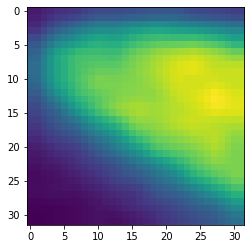

In [18]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.appearances[0][12][13])

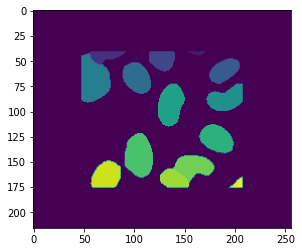

In [19]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[500][0])

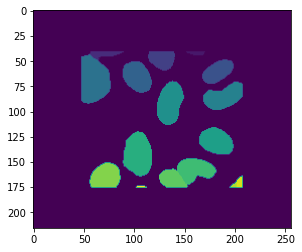

In [21]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[500][1])

In [22]:
died = {}
for batch_num in possibly_died:
    died[batch_num] = {}
    for cell_num in possibly_died.get(batch_num):
        death_frame = possibly_died.get(batch_num).get(cell_num)
        death_img = cell_tracks.y[batch_num][death_frame]
        on_border = False
        for x in range(x_min + 1, x_max):
            if death_img[x][y_min + 1] == cell_num or death_img[x][y_max - 1] == cell_num:
                on_border = True
                break
        if on_border == False:
            for y in range(y_min + 1, y_max):
                if death_img[x_min + 1][y] == cell_num or death_img[x_max - 1][y] == cell_num:
                    on_border = True
                    break
        if on_border == False:
            died[batch_num][cell_num] = possibly_died.get(batch_num).get(cell_num)

In [23]:
died

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {14: 0},
 7: {},
 8: {},
 9: {},
 10: {18: 4},
 11: {},
 12: {},
 13: {},
 14: {},
 15: {},
 16: {},
 17: {},
 18: {},
 19: {},
 20: {13: 4},
 21: {},
 22: {},
 23: {},
 24: {17: 18},
 25: {},
 26: {},
 27: {},
 28: {},
 29: {},
 30: {},
 31: {},
 32: {},
 33: {},
 34: {},
 35: {},
 36: {},
 37: {},
 38: {},
 39: {},
 40: {},
 41: {},
 42: {},
 43: {},
 44: {},
 45: {},
 46: {},
 47: {},
 48: {},
 49: {},
 50: {},
 51: {},
 52: {4: 21},
 53: {},
 54: {13: 7},
 55: {},
 56: {},
 57: {},
 58: {},
 59: {},
 60: {},
 61: {},
 62: {},
 63: {7: 11},
 64: {},
 65: {},
 66: {},
 67: {},
 68: {},
 69: {},
 70: {},
 71: {},
 72: {},
 73: {},
 74: {},
 75: {},
 76: {},
 77: {},
 78: {},
 79: {},
 80: {},
 81: {},
 82: {},
 83: {},
 84: {},
 85: {},
 86: {},
 87: {},
 88: {},
 89: {},
 90: {},
 91: {},
 92: {},
 93: {},
 94: {},
 95: {},
 96: {},
 97: {},
 98: {},
 99: {},
 100: {},
 101: {},
 102: {},
 103: {},
 104: {},
 105: {},
 106: {},
 107

In [24]:
possibly_died

{0: {14: 12, 15: 22, 16: 23},
 1: {},
 2: {2: 24},
 3: {},
 4: {},
 5: {},
 6: {14: 0},
 7: {},
 8: {},
 9: {},
 10: {13: 19, 15: 25, 17: 25, 18: 4, 19: 4},
 11: {},
 12: {},
 13: {},
 14: {10: 8},
 15: {15: 23},
 16: {},
 17: {10: 25, 11: 9},
 18: {9: 1},
 19: {},
 20: {11: 13, 12: 22, 13: 4},
 21: {},
 22: {11: 18},
 23: {},
 24: {17: 18},
 25: {8: 4, 9: 22},
 26: {},
 27: {},
 28: {10: 25, 12: 20},
 29: {10: 15, 13: 23},
 30: {10: 28},
 31: {},
 32: {},
 33: {},
 34: {},
 35: {},
 36: {13: 16},
 37: {},
 38: {17: 23},
 39: {4: 24},
 40: {},
 41: {},
 42: {16: 26},
 43: {11: 14},
 44: {},
 45: {},
 46: {},
 47: {5: 24},
 48: {},
 49: {},
 50: {12: 12},
 51: {},
 52: {4: 21},
 53: {7: 16},
 54: {11: 19, 12: 28, 13: 7},
 55: {},
 56: {},
 57: {},
 58: {3: 25, 8: 5, 12: 19, 13: 25, 15: 13, 17: 14, 18: 20},
 59: {},
 60: {9: 8, 11: 14},
 61: {},
 62: {},
 63: {7: 11, 10: 28},
 64: {},
 65: {},
 66: {},
 67: {7: 5, 10: 26, 14: 13},
 68: {},
 69: {5: 27},
 70: {},
 71: {19: 15},
 72: {12: 

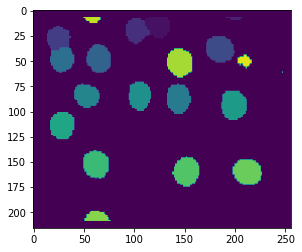

In [25]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[681][17])

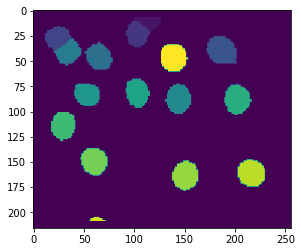

In [26]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[681][18])

In [27]:
cell_tracks.y[681][17][50][210]

array([21], dtype=int32)

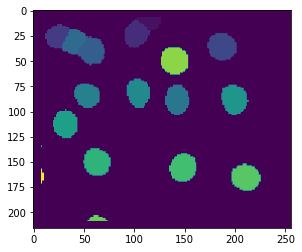

In [28]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[681][19])

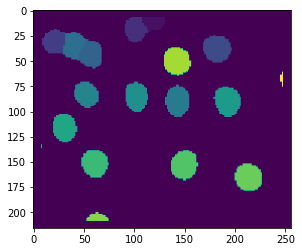

In [29]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[681][20])

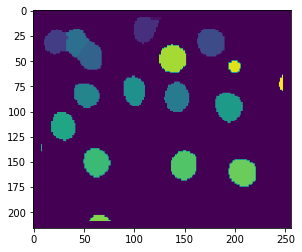

In [30]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[681][21])

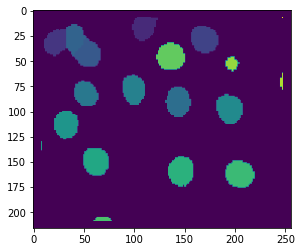

In [31]:
fig, ax = plt.subplots()
ax.imshow(cell_tracks.y[681][22])

In [32]:
died = {}
for batch_num in possibly_died:
    died[batch_num] = {}
    x_min = 0
    x_max = 0
    y_min = 0
    y_max = 0
    for x in range(cell_tracks.X.shape[2]):
        if cell_tracks.X[batch_num][0][x][100] != 0:
            x_min = x - 1
            break
    for x in range(cell_tracks.X.shape[2] - 1, -1, -1):
        if cell_tracks.X[batch_num][0][x][100] != 0:
            x_max = x + 1
            break
    for y in range(cell_tracks.X.shape[3]):
        if cell_tracks.X[batch_num][0][100][y] != 0:
            y_min = y - 1
            break
    for y in range(cell_tracks.X.shape[3] - 1, -1 , -1):
        if cell_tracks.X[batch_num][0][100][y] != 0:
            y_max = y + 1
            break
    for cell_num in possibly_died.get(batch_num):
        death_frame = possibly_died.get(batch_num).get(cell_num)
        death_img = cell_tracks.y[batch_num][death_frame]
        on_border = False
        for x in range(x_min + 1, x_max):
            if death_img[x][y_min + 1] == cell_num or death_img[x][y_max - 1] == cell_num:
                on_border = True
                break
        if on_border == False:
            for y in range(y_min + 1, y_max):
                if death_img[x_min + 1][y] == cell_num or death_img[x_max - 1][y] == cell_num:
                    on_border = True
                    break
        if on_border == False:
            died[batch_num][cell_num] = possibly_died.get(batch_num).get(cell_num)

In [33]:
possibly_died_cells = []
for batch_num in possibly_died:
    for cell_num in possibly_died.get(batch_num):
        possibly_died_cells.append((batch_num, cell_num))

died_cells = []
for batch_num in died:
    for cell_num in died.get(batch_num):
        died_cells.append((batch_num, cell_num))
        
diff = [cell for cell in possibly_died_cells if cell not in died_cells]
print(diff)

[(0, 14), (0, 15), (0, 16), (2, 2), (10, 13), (10, 15), (10, 17), (10, 19), (14, 10), (15, 15), (17, 10), (17, 11), (18, 9), (20, 11), (20, 12), (22, 11), (25, 8), (25, 9), (28, 10), (28, 12), (29, 10), (29, 13), (30, 10), (36, 13), (38, 17), (39, 4), (42, 16), (43, 11), (47, 5), (50, 12), (53, 7), (54, 11), (54, 12), (58, 3), (58, 8), (58, 12), (58, 13), (58, 15), (58, 17), (58, 18), (60, 9), (60, 11), (63, 10), (67, 7), (67, 10), (67, 14), (69, 5), (71, 19), (72, 12), (73, 4), (73, 12), (73, 15), (75, 10), (76, 7), (76, 12), (77, 2), (77, 12), (78, 11), (81, 10), (82, 5), (83, 3), (83, 5), (83, 10), (85, 15), (86, 9), (86, 12), (87, 15), (88, 15), (88, 20), (89, 18), (90, 5), (90, 14), (90, 17), (91, 12), (91, 19), (93, 2), (93, 13), (94, 17), (95, 11), (100, 1), (100, 19), (101, 13), (102, 14), (102, 16), (102, 17), (103, 7), (104, 14), (104, 15), (104, 17), (105, 3), (107, 3), (107, 16), (107, 23), (107, 24), (108, 7), (109, 3), (109, 10), (110, 6), (110, 9), (112, 10), (115, 9), (

In [34]:
len(died_cells)

103

In [35]:
len(possibly_died_cells)

1352